In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import pandas as pd
import random
import itertools
import seaborn as sns

sns.set(style = 'darkgrid')
% matplotlib inline

In [6]:
def plot_confusion_matrix(cm, classes, normalize=False):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Counfusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
df = pd.read_csv('data.csv')
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [8]:
dfs = pd.DataFrame(preprocessing.scale(df.iloc[:,2:32]))
dfs.columns = list(df.iloc[:,2:32].columns)
dfs['diagnosis'] = df['diagnosis']

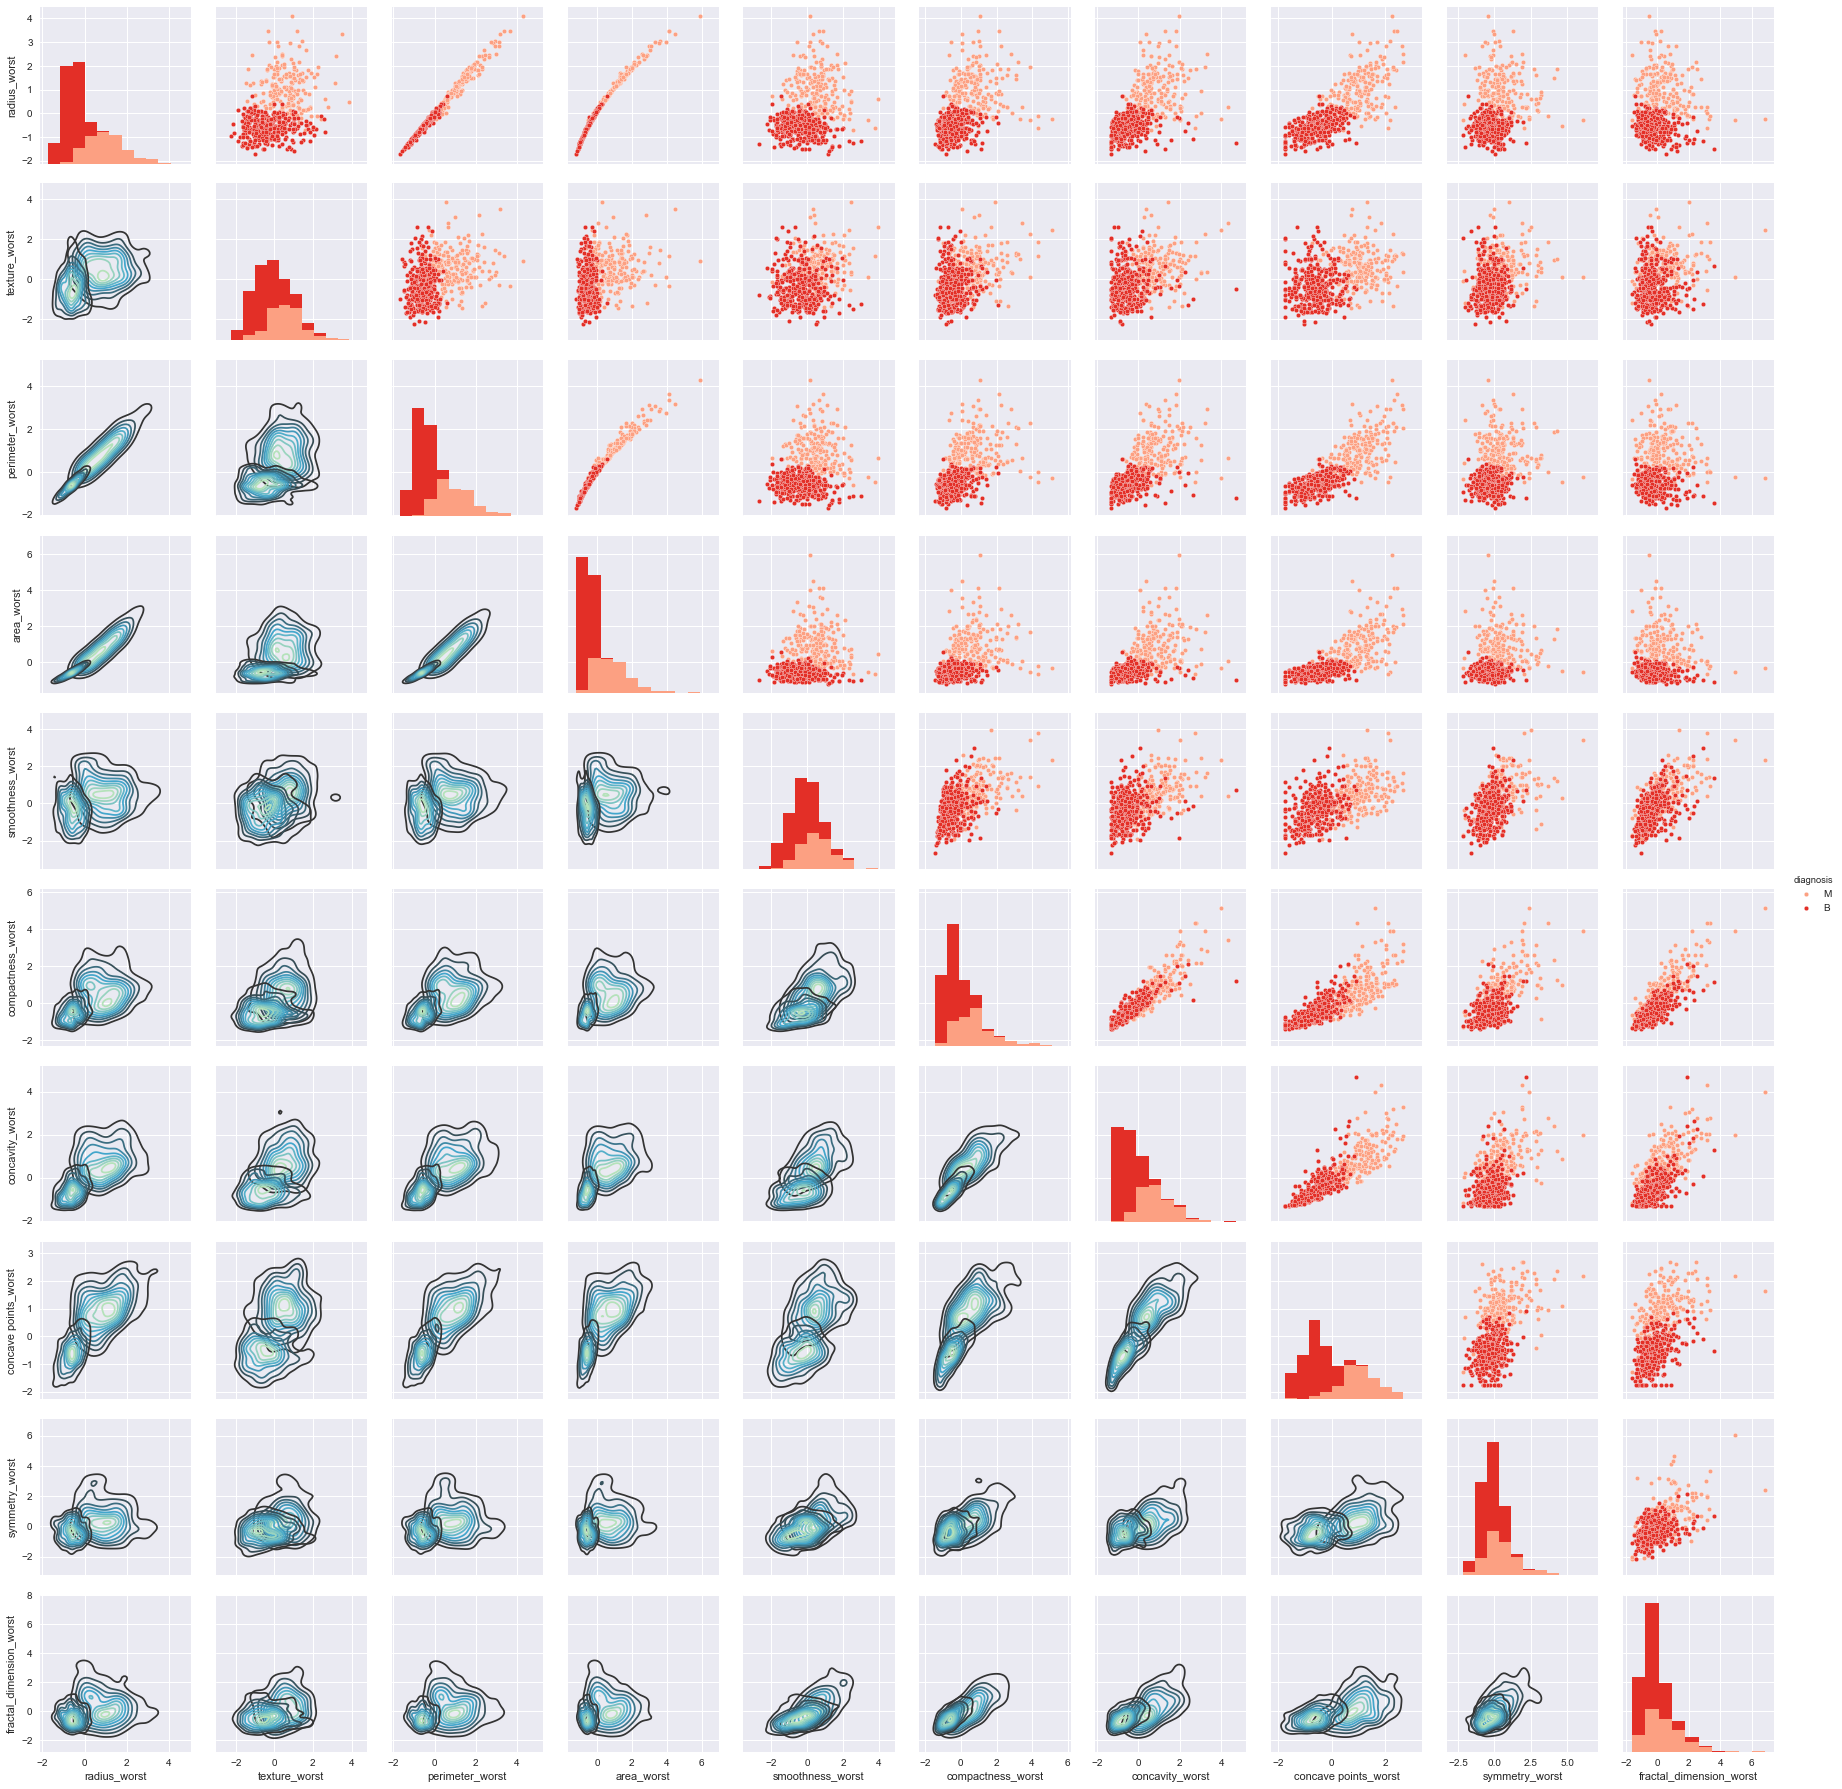

In [9]:
from pandas.tools.plotting import scatter_matrix
p = sns.PairGrid(dfs.iloc[:,20:32], hue='diagnosis', palette='Reds')
p.map_upper(plt.scatter, s=20, edgecolor='w')
p.map_diag(plt.hist)
p.map_lower(sns.kdeplot, cmap='GnBu_d')
p.add_legend()

p.figsize = (30,30)

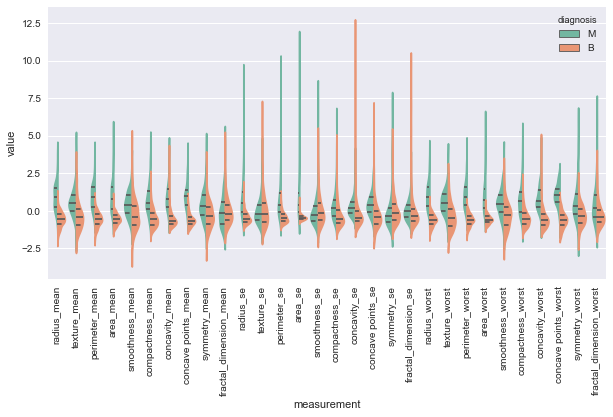

In [10]:
mbc = pd.melt(dfs, 'diagnosis', var_name = 'measurement')
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.violinplot(ax = ax, x='measurement', y='value', hue='diagnosis',
                  split = True, data=mbc, inner='quartile', palette = 'Set2')
p.set_xticklabels(rotation=90, labels = list(dfs.columns))

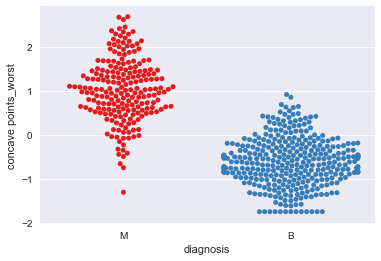

In [11]:
sns.swarmplot(x = 'diagnosis', y='concave points_worst', palette = 'Set1',
             data = dfs)

In [ ]:
X = dfs.iloc[:,0:30]
y = dfs['diagnosis']
class_names = list(y.unique())

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
svc = SVC(kernel = 'linear', C=.1, gamma=10, probability=True)
svc.fit(X,y)
y_pred = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.98241206030150752, 0.98245614035087714)

Confusion matrix, without normalization
[[107   1]
 [  2  61]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.03  0.97]]


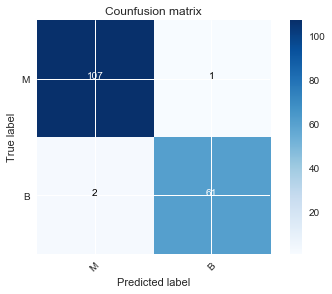

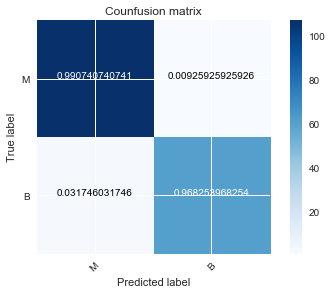

In [17]:
mtrx = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(mtrx, classes=class_names)

plt.figure()
plot_confusion_matrix(mtrx, classes=class_names, normalize = True)

plt.show()